### *This notebook runs ok in Jupyter, but not so well in Google Colab, due to a possible bug in Colab interaction with ipywidgets and plotly.

# Imports and options

In [1]:
import numpy as np
import pandas as pd
import datatable as dt
import plotly.graph_objects as go
from matplotlib.colors import LinearSegmentedColormap, to_hex
import ipywidgets as widgets
from scipy.stats import skew
import plotly.express as px

# Display options:
pd.set_option("display.width", 1200)
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

# Dataset

In [2]:
# Read the data:
df_videos = dt.fread("data/videos_data.csv", sep = ";").to_pandas()

In [3]:
df_videos.head(5)

,channel_title,channel_id,video_title,video_id,video_upload_date,views,likes,dislikes,comments,age_days,likes_dislikes_ratio,likes_views_ratio,dislikes_views_ratio,comments_views_ratio,comments_likes_ratio,comments_dislikes_ratio,mean_views_day,mean_likes_day,mean_dislikes_day,mean_comments_day,mean_likes_dislikes_ratio_day,mean_likes_views_ratio_day,mean_dislikes_views_ratio_day,mean_comments_views_ratio_day,mean_comments_likes_ratio_day,mean_comments_dislikes_ratio_day
0,3Blue1Brown,UCYO_jab_esuFRV4b17AJtAw,A few of the best math explainers from this su...,F3Qixy-r_rQ,2021-10-23 18:11:23+00:00,537453,30720,113,785,18.0,271.858407,0.057158,0.000210,0.001461,0.025553,6.946903,29858.500000,1706.666667,6.277778,43.611111,15.103245,0.003175,0.000012,0.000081,0.001420,0.385939
1,3Blue1Brown,UCYO_jab_esuFRV4b17AJtAw,How a Mandelbrot set arises from Newton’s work,LqbZpur38nw,2021-10-15 16:41:50+00:00,621248,27411,156,1248,26.0,175.711538,0.044122,0.000251,0.002009,0.045529,8.000000,23894.153846,1054.269231,6.000000,48.000000,6.758136,0.001697,0.000010,0.000077,0.001751,0.307692
2,3Blue1Brown,UCYO_jab_esuFRV4b17AJtAw,Newton's Fractal (which Newton knew nothing ab...,-RdOwhmqP5s,2021-10-07 02:19:39+00:00,1267428,63787,304,2864,34.0,209.825658,0.050328,0.000240,0.002260,0.044899,9.421053,37277.294118,1876.088235,8.941176,84.235294,6.171343,0.001480,0.000007,0.000066,0.001321,0.277090
3,3Blue1Brown,UCYO_jab_esuFRV4b17AJtAw,The Summer of Math Exposition,ojjzXyQCzso,2021-07-16 15:37:16+00:00,616067,29415,216,1721,117.0,136.180556,0.047746,0.000351,0.002794,0.058508,7.967593,5265.529915,251.410256,1.846154,14.709402,1.163936,0.000408,0.000003,0.000024,0.000500,0.068099
4,3Blue1Brown,UCYO_jab_esuFRV4b17AJtAw,A quick trick for computing eigenvalues | Chap...,e50Bj7jn9IQ,2021-05-07 19:01:16+00:00,432555,17245,145,1150,186.0,118.931034,0.039868,0.000335,0.002659,0.066686,7.931034,2325.564516,92.715054,0.779570,6.182796,0.639414,0.000214,0.000002,0.000014,0.000359,0.042640


In [4]:
# Int to float:
df_videos = df_videos.astype({
    "views": "float64",
    "likes": "float64",
    "dislikes": "float64",
    "comments": "float64"
})

In [5]:
df_videos.dtypes

channel_title                        object
channel_id                           object
video_title                          object
video_id                             object
video_upload_date                    object
views                               float64
likes                               float64
dislikes                            float64
comments                            float64
age_days                            float64
likes_dislikes_ratio                float64
likes_views_ratio                   float64
dislikes_views_ratio                float64
comments_views_ratio                float64
comments_likes_ratio                float64
comments_dislikes_ratio             float64
mean_views_day                      float64
mean_likes_day                      float64
mean_dislikes_day                   float64
mean_comments_day                   float64
mean_likes_dislikes_ratio_day       float64
mean_likes_views_ratio_day          float64
mean_dislikes_views_ratio_day   

In [6]:
df_videos.describe()

,views,likes,dislikes,comments,age_days,likes_dislikes_ratio,likes_views_ratio,dislikes_views_ratio,comments_views_ratio,comments_likes_ratio,comments_dislikes_ratio,mean_views_day,mean_likes_day,mean_dislikes_day,mean_comments_day,mean_likes_dislikes_ratio_day,mean_likes_views_ratio_day,mean_dislikes_views_ratio_day,mean_comments_views_ratio_day,mean_comments_likes_ratio_day,mean_comments_dislikes_ratio_day
count,1.508990e+05,1.508990e+05,1.508990e+05,150899.000000,150899.000000,150899.000000,150899.000000,1.508990e+05,1.508990e+05,150899.000000,150899.000000,1.508990e+05,150899.000000,150899.000000,150899.000000,150899.000000,1.508990e+05,1.508990e+05,1.508990e+05,1.508990e+05,150899.000000
mean,6.764919e+05,1.459496e+04,4.900862e+02,970.393694,1640.070365,67.316134,0.111443,2.184485e-03,1.002503e-02,0.134334,5.863109,1.063808e+03,35.516953,0.892459,2.286351,0.212357,1.773917e-04,3.651126e-06,1.438528e-05,2.527357e-04,0.015528
std,2.997723e+06,4.630269e+04,6.900628e+03,3566.730200,1132.317065,83.937714,28.213952,3.982119e-01,2.490369e+00,0.213136,11.767920,8.713970e+03,382.157568,15.704292,21.051067,1.894871,8.322635e-03,1.280021e-04,7.353772e-04,2.314799e-03,0.164234
min,2.000000e+01,1.000000e+00,1.000000e+00,1.000000,2.000000,0.021739,0.000058,7.518938e-07,6.929110e-07,0.000017,0.000184,7.908816e-03,0.000226,0.000191,0.000192,0.000014,1.947836e-08,7.371508e-10,3.889877e-10,1.174868e-07,0.000001
25%,2.318250e+04,4.460000e+02,1.200000e+01,46.000000,762.000000,19.156954,0.010699,2.955819e-04,8.927642e-04,0.049850,1.616405,1.518840e+01,0.259012,0.007187,0.026692,0.010965,5.403867e-06,1.605642e-07,4.976829e-07,3.330829e-05,0.000991
50%,8.830700e+04,2.276000e+03,4.900000e+01,194.000000,1490.000000,42.819421,0.021290,5.607657e-04,1.958028e-03,0.081968,3.333333,7.681737e+01,1.934253,0.043736,0.168589,0.030873,1.552439e-05,4.761955e-07,1.505283e-06,6.531864e-05,0.002527
75%,3.625890e+05,9.841500e+03,2.050000e+02,725.000000,2217.000000,84.904409,0.042788,1.076395e-03,4.140772e-03,0.145684,6.600000,4.149035e+02,12.265823,0.265232,0.873976,0.090780,6.049856e-05,1.421126e-06,4.839349e-06,1.456903e-04,0.006848
max,3.264996e+08,3.298941e+06,2.387909e+06,340812.000000,5749.000000,4030.000000,10959.936877,1.546844e+02,9.674020e+02,23.500000,1455.000000,1.437207e+06,79053.600000,5248.151648,3044.800000,369.500000,3.197181e+00,4.512380e-02,2.822059e-01,3.529412e-01,38.750000


In [8]:
df_videos.shape

(150899, 26)

In [11]:
len(df_videos["channel_title"].unique())

207

# Plots

## Barplot of the number of videos by channel

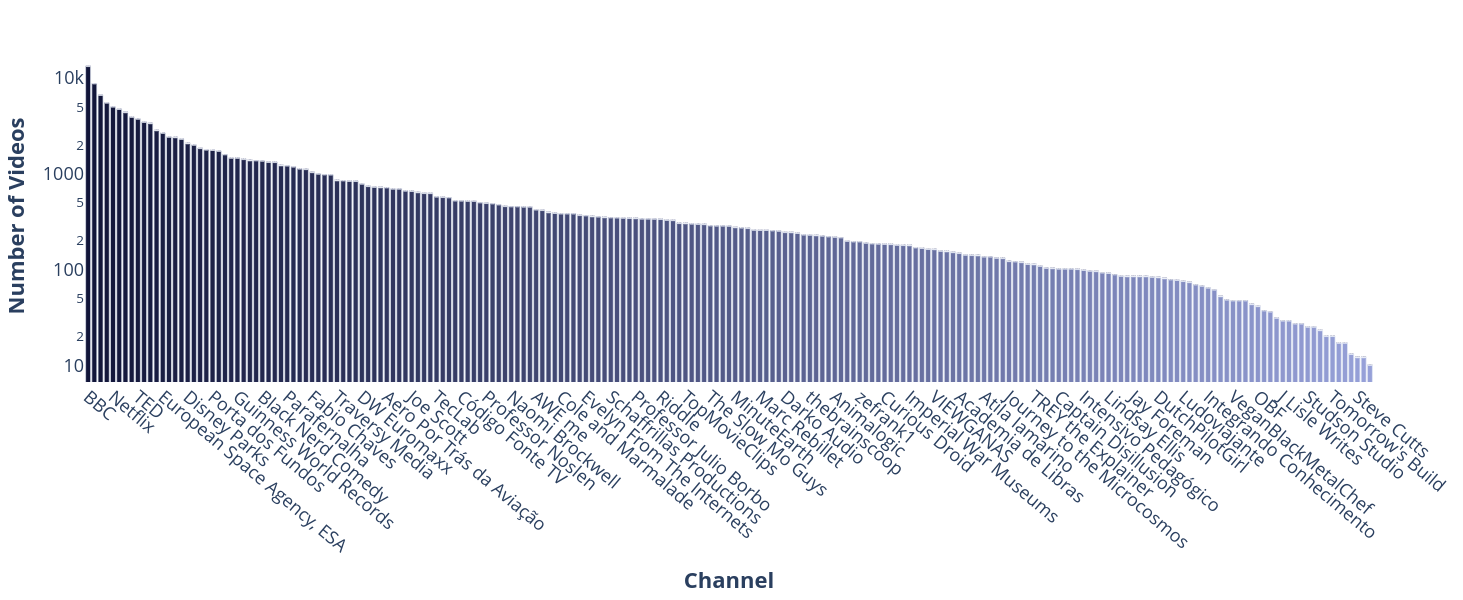

In [12]:
# Frequencie of videos:
video_counts = df_videos['channel_title'].value_counts()
df_plot = pd.DataFrame(
    {
        "channel": video_counts.index.tolist(),
        "freq": video_counts.tolist()
    }
)

# Relative frequency:
df_plot["freq_rel"] = [round(i/sum(df_plot["freq"])*100, 3) for i in df_plot["freq"]]
df_plot["freq_rel_char"] = [str(i) + "%" for i in df_plot["freq_rel"]]

# Palette:
n_levels = df_plot.shape[0]
cmap = LinearSegmentedColormap.from_list("my_palette", ["#111539", "#97A1D9"])
my_palette = [to_hex(j) for j in  [cmap(i/n_levels) for i in np.array(range(n_levels))]]

# Plot:
fig = px.bar(
    data_frame = df_plot,
    x = "channel",
    y = "freq",
    log_y = True,
    color = "channel",
    color_discrete_sequence = my_palette,
    text = "freq_rel_char"
)
fig.update_traces(
    textposition = "outside",
    textfont_color = my_palette[n_levels//2],
    textfont_size = 15,
    hovertemplate = "<b>Channel: %{x}<br>Frequency: %{y:}</b><extra></extra>"
)
fig.update_layout(
    xaxis_title = "<b>Channel</b>" ,
    yaxis_title = "<b>Number of Videos</b>",
    xaxis = dict(
        tickangle = 40
    ),
    font = dict(
        size = 18
    ),
    showlegend = False,
    plot_bgcolor = "white",
    hoverlabel = dict(
        font_size = 18,
        font_family = "Rockwell"
    ),
    margin = dict(
        l = 20,
        r = 20,
        t = 50,
        b = 20
    ),
    height = 600
)

# Dynamic plots

## Variables and options

In [13]:
# Variables names:
vars_names = {
    "Views": "views",
    "Likes": "likes",
    "Dislikes": "dislikes",
    "Comments": "comments",
    "Likes/dislikes": "likes_dislikes_ratio",
    "Age (days)": "age_days",
    "Likes/dislikes": "likes_dislikes_ratio",
    "Likes/views": "likes_views_ratio",
    "Comments/views": "comments_views_ratio",
    "Comments/likes": "comments_likes_ratio",
    "Comments/dislikes": "comments_dislikes_ratio",
    "Mean views per day": "mean_views_day",
    "Mean likes per day": "mean_likes_day",
    "Mean dislikes per day": "mean_dislikes_day",
    "Mean comments per day": "mean_comments_day",
    "Mean likes/dislikes per day": "mean_likes_dislikes_ratio_day",
    "Mean likes/views per day": "mean_likes_views_ratio_day",
    "Mean dislikes/views per day": "mean_dislikes_views_ratio_day",
    "Mean comments/views per day": "mean_comments_views_ratio_day",
    "Mean comments/likes per day": "mean_comments_likes_ratio_day",
    "Mean comments/dislikes per day": "mean_comments_dislikes_ratio_day"
}

# Options:
opts_channel = np.sort(df_videos["channel_title"].unique()).tolist()
opts_vars = list(vars_names.keys())
opts_vars = [i for i in vars_names.keys()]
opts_vars.sort()

# Custom hovers:
custom_vars = list(vars_names.values())
custom_template = "<b>Video title: %{text}<br>"
for i in range(0, len(custom_vars)):
    custom_template += list(vars_names.keys())[i] + ": %{customdata[" + str(i) + "]:}<br>"
custom_template = custom_template + "</b><extra></extra>"

## 1D histogram

In [11]:
# Variable and filters widgets:
input_xvar = widgets.Dropdown(
    description = "Variable: ",
    options = list(vars_names.keys()),
    value = list(vars_names.keys())[0]
)
input_channels = widgets.Dropdown(
    description = "Channel: ",
    options = opts_channel,
    value = opts_channel[0]
)
input_bins = widgets.IntSlider(
    description = "Bins: ",
    min = 10,
    max = 1000,
    step = 10,
    value = 200
)
input_xmin = widgets.FloatText(
    value = np.min(df_videos[vars_names[input_xvar.value]]),
    description = "Min: "
)
input_xmax = widgets.FloatText(
    value = np.max(df_videos[vars_names[input_xvar.value]]),
    description = "Max: "
)

# Statistics in the title:
def plot_title(x):
    title = "Filtered sample statistics<br>" +\
            "<b style = 'color: #900c3f'>Mean</b>: " + f"{np.mean(x):.7g}      " +\
            "<b style = 'color: #ffc300'>Median</b>: " + f"{np.median(x):.7g}      " +\
            "<b>Standard deviation</b>: " + f"{np.std(x):.7g}      " +\
            "<b>Skewness</b>: " + f"{skew(x):.3g}"
    return(title)

# Mean and median lines:
def vert_lines(x):
    vertical_lines = [
        {
            'line': {
                'color': '#900c3f',
                'dash': 'dash',
                'width': 2
            },
            'type': 'line',
            'x0': np.mean(x),
            'x1': np.mean(x),
            'xref': 'x',
            'y0': 0,
            'y1': 1,
            'yref': 'paper'
        },
        {
            'line': {
                'color': '#ffc300',
                'dash': 'dash',
                'width': 2
            },
            'type': 'line',
            'x0': np.median(x),
            'x1': np.median(x),
            'xref': 'x',
            'y0': 0,
            'y1': 1,
            'yref': 'paper'
        }
    ]
    return(vertical_lines)

# Initialize the figure:
x_init = df_videos.loc[df_videos["channel_title"] == opts_channel[0], vars_names[input_xvar.value]]
x_mean = np.mean(x_init)
x_median = np.median(x_init)
fig = go.FigureWidget(
    data = [
        go.Histogram(
            x = x_init,
            histfunc = "count",
            nbinsx = input_bins.value,
            marker_color = "#00baad",
            opacity = 0.9
        )
    ],
    layout = go.Layout(
        title = plot_title(x_init),
        xaxis_title = "<b>" + input_xvar.value + "</b>",
        yaxis_title = "<b>Counts</b>",
        font = dict(
            size = 18
        ),
        showlegend = False,
        plot_bgcolor = "white",
        hoverlabel = dict(
            font_size = 18,
            font_family = "Rockwell"
        ),
        margin = dict(
            l = 20,
            r = 20,
            t = 100,
            b = 20
        ),
        height = 600,
        shapes = vert_lines(x_init)
    )
)

# Filter and update function:
def filtering(chosen_xvar, chosen_channel, chosen_bins, chosen_xmin, chosen_xmax):
    # Filter by channel:
    df_filtered = df_videos.copy()[df_videos["channel_title"] == chosen_channel]
    
    # Variable:
    x_vals = df_filtered[vars_names[chosen_xvar]]

    # Filter the range:
    if chosen_xmin >= chosen_xmax or chosen_xmax < np.min(x_vals) or chosen_xmin > np.max(x_vals):
        pass
    else:
        if chosen_xmin < np.min(x_vals):
            pass
        else:
            x_vals = x_vals[x_vals > chosen_xmin]
        if chosen_xmax > np.max(x_vals):
            pass
        else:
            x_vals = x_vals[x_vals < chosen_xmax]
    
    # Drop the nan:
    x_vals = x_vals.dropna()

    # Update the figure:
    with fig.batch_update():
        fig.data[0].x = x_vals
        fig.data[0].nbinsx = chosen_bins
        fig.layout.xaxis.title = "<b>" + chosen_xvar + "</b>"
        fig.layout.title = plot_title(x_vals)
        fig.layout.shapes = vert_lines(x_vals)

# Event handlers:
def eventhandler_xvar(change):
    filtering(chosen_xvar = change.new,
              chosen_channel = input_channels.value,
              chosen_bins = input_bins.value,
              chosen_xmin = input_xmin.value,
              chosen_xmax = input_xmax.value)
def eventhandler_channels(change):
    filtering(chosen_xvar = input_xvar.value,
              chosen_channel = change.new,
              chosen_bins = input_bins.value,
              chosen_xmin = input_xmin.value,
              chosen_xmax = input_xmax.value)
def eventhandler_bins(change):
    filtering(chosen_xvar = input_xvar.value,
              chosen_channel = input_channels.value,
              chosen_bins = change.new,
              chosen_xmin = input_xmin.value,
              chosen_xmax = input_xmax.value)
def eventhandler_xmin(change):
    filtering(chosen_xvar = input_xvar.value,
              chosen_channel = input_channels.value,
              chosen_bins = input_bins.value,
              chosen_xmin = change.new,
              chosen_xmax = input_xmax.value)
def eventhandler_xmax(change):
    filtering(chosen_xvar = input_xvar.value,
              chosen_channel = input_channels.value,
              chosen_bins = input_bins.value,
              chosen_xmin = input_xmin.value,
              chosen_xmax = change.new)

# Observes:
input_xvar.observe(eventhandler_xvar,
                   names = "value")
input_channels.observe(eventhandler_channels,
                       names = "value")
input_bins.observe(eventhandler_bins,
                   names = "value")
input_xmin.observe(eventhandler_xmin,
                   names = "value")
input_xmax.observe(eventhandler_xmax,
                   names = "value")

# Row of filters:
row_filters = widgets.HBox(
    [
        input_xvar,
        input_channels,
        input_bins,
        input_xmin,
        input_xmax
    ]
)

# Main box:
widgets.VBox(
    [
        row_filters,
        fig
    ]
)

## 2D Density

In [11]:
# Variables and filters widgets:
input_xvar = widgets.Dropdown(
    description = "x: ",
    options = list(vars_names.keys()),
    value = list(vars_names.keys())[0]
)
input_yvar = widgets.Dropdown(
    description = "y: ",
    options = list(vars_names.keys()),
    value = list(vars_names.keys())[1]
)
input_channels = widgets.Dropdown(
    description = "Channel: ",
    options = opts_channel,
    value = opts_channel[0]
)

# Palette:
my_colors = ["#000000", "#E008F8", "#F81D08", "#F88A08", "#F7FE04"]

# Initialize the figure:
df_plot = df_videos[df_videos["channel_title"] == opts_channel[0]]
x_init = df_plot[vars_names[input_xvar.value]]
y_init = df_plot[vars_names[input_yvar.value]]
fig = go.FigureWidget(
    data = [
        go.Histogram2dContour(
            x = x_init,
            y = y_init,
            colorscale = my_colors,
            ncontours = 10,
            histnorm = "probability density",
            colorbar = dict(
                title = "<b>Density</b>"
            )
        )
    ],
    layout = go.Layout(
        xaxis_title = "<b>" + input_xvar.value + "</b>",
        yaxis_title = "<b>" + input_yvar.value + "</b>",
        font = dict(
            size = 18
        ),
        showlegend = False,
        plot_bgcolor = "white",
        hoverlabel = dict(
            font_size = 18,
            font_family = "Rockwell"
        ),
        margin = dict(
            l = 400,
            r = 20,
            t = 20,
            b = 20
        ),
        height = 600,
        width = 1100
    )
)

# Filter and update function:
def filtering(chosen_xvar, chosen_yvar, chosen_channel):
    # Filter by channel:
    df_filtered = df_videos.copy()[df_videos["channel_title"] == chosen_channel]
    
    # Variables:
    x_vals = df_filtered[vars_names[chosen_xvar]]
    y_vals = df_filtered[vars_names[chosen_yvar]]

    # Update the figure:
    with fig.batch_update():
        fig.data[0].x = x_vals
        fig.data[0].y = y_vals
        fig.layout.xaxis.title = "<b>" + chosen_xvar + "</b>"
        fig.layout.yaxis.title = "<b>" + chosen_yvar + "</b>"

# Event handlers:
def eventhandler_xvar(change):
    filtering(chosen_xvar = change.new,
              chosen_yvar = input_yvar.value,
              chosen_channel = input_channels.value)
def eventhandler_yvar(change):
    filtering(chosen_xvar = input_xvar.value,
              chosen_yvar = change.new,
              chosen_channel = input_channels.value)
def eventhandler_channels(change):
    filtering(chosen_xvar = input_xvar.value,
              chosen_yvar = input_yvar.value,
              chosen_channel = change.new)

# Observes:
input_xvar.observe(eventhandler_xvar,
                   names = "value")
input_yvar.observe(eventhandler_yvar,
                   names = "value")
input_channels.observe(eventhandler_channels,
                       names = "value")

# Row of filters:
row_filters = widgets.HBox(
    [
        input_xvar,
        input_yvar,
        input_channels
    ]
)

# Main box:
widgets.VBox(
    [
        row_filters,
        fig
    ]
)

## Scatter with colors

In [39]:
# Variables and filters widgets:
input_xvar = widgets.Dropdown(
    description = "x: ",
    options = list(vars_names.keys()),
    value = list(vars_names.keys())[0]
)
input_yvar = widgets.Dropdown(
    description = "y: ",
    options = list(vars_names.keys()),
    value = list(vars_names.keys())[1]
)
input_cvar = widgets.Dropdown(
    description = "color: ",
    options = list(vars_names.keys()),
    value = list(vars_names.keys())[2]
)
input_channels = widgets.Dropdown(
    description = "Channel: ",
    options = opts_channel,
    value = opts_channel[0]
)

# Palette:
n_colors = 100
my_colors = ["#000000", "#E008F8", "#F81D08", "#F88A08", "#F7FE04"]
cmap = LinearSegmentedColormap.from_list("my_palette", my_colors)
my_palette = [to_hex(j) for j in  [cmap(i/n_colors) for i in np.array(range(n_colors))]]

# Initialize the figure:
df_plot = df_videos[df_videos["channel_title"] == opts_channel[0]]
x_init = df_plot[vars_names[input_xvar.value]]
y_init = df_plot[vars_names[input_yvar.value]]
c_init = df_plot[vars_names[input_cvar.value]]
fig = go.FigureWidget(
    data = [
        go.Scatter(
            x = x_init,
            y = y_init,
            mode = "markers",
            marker = {
                "size": 7,
                "color": c_init,
                "colorscale": my_palette,
                "showscale": True,
                "colorbar": {
                    "title": "<b>" + input_cvar.value + "</b>"
                }
            },
            text = df_plot["video_title"],
            customdata = df_plot[custom_vars],
            hovertemplate = custom_template
        )
    ],
    layout = go.Layout(
        xaxis_title = "<b>" + input_xvar.value + "</b>",
        yaxis_title = "<b>" + input_yvar.value + "</b>",
        font = dict(
            size = 18
        ),
        showlegend = False,
        plot_bgcolor = "white",
        hoverlabel = dict(
            font_size = 18,
            font_family = "Rockwell"
        ),
        margin = dict(
            l = 20,
            r = 20,
            t = 20,
            b = 20
        ),
        height = 600
    )
)

# Filter and update function:
def filtering(chosen_xvar, chosen_yvar, chosen_cvar, chosen_channel):
    # Filter by channel:
    df_filtered = df_videos.copy()[df_videos["channel_title"] == chosen_channel]
    
    # Variables:
    x_vals = df_filtered[vars_names[chosen_xvar]]
    y_vals = df_filtered[vars_names[chosen_yvar]]
    c_vals = df_filtered[vars_names[chosen_cvar]]

    # Update the figure:
    with fig.batch_update():
        fig.data[0].x = x_vals
        fig.data[0].y = y_vals
        fig.layout.xaxis.title = "<b>" + chosen_xvar + "</b>"
        fig.layout.yaxis.title = "<b>" + chosen_yvar + "</b>"
        fig.data[0].marker.color = c_vals
        fig.data[0].marker.colorbar.title = "<b>" + chosen_cvar + "</b>"
        fig.data[0].text = df_filtered["video_title"]
        fig.data[0].customdata = df_filtered[custom_vars]

# Event handlers:
def eventhandler_xvar(change):
    filtering(chosen_xvar = change.new,
              chosen_yvar = input_yvar.value,
              chosen_cvar = input_cvar.value,
              chosen_channel = input_channels.value)
def eventhandler_yvar(change):
    filtering(chosen_xvar = input_xvar.value,
              chosen_yvar = change.new,
              chosen_cvar = input_cvar.value,
              chosen_channel = input_channels.value)
def eventhandler_cvar(change):
    filtering(chosen_xvar = input_xvar.value,
              chosen_yvar = input_yvar.value,
              chosen_cvar = change.new,
              chosen_channel = input_channels.value)
def eventhandler_channels(change):
    filtering(chosen_xvar = input_xvar.value,
              chosen_yvar = input_yvar.value,
              chosen_cvar = input_cvar.value,
              chosen_channel = change.new)

# Observes:
input_xvar.observe(eventhandler_xvar,
                   names = "value")
input_yvar.observe(eventhandler_yvar,
                   names = "value")
input_cvar.observe(eventhandler_cvar,
                   names = "value")
input_channels.observe(eventhandler_channels,
                       names = "value")

# Row of filters:
row_filters = widgets.HBox(
    [
        input_xvar,
        input_yvar,
        input_cvar,
        input_channels
    ]
)

# Main box:
widgets.VBox(
    [
        row_filters,
        fig
    ]
)

## Bubble with colors

In [40]:
# Variables and filters widgets:
input_xvar = widgets.Dropdown(
    description = "x: ",
    options = list(vars_names.keys()),
    value = list(vars_names.keys())[0]
)
input_yvar = widgets.Dropdown(
    description = "y: ",
    options = list(vars_names.keys()),
    value = list(vars_names.keys())[1]
)
input_cvar = widgets.Dropdown(
    description = "color: ",
    options = list(vars_names.keys()),
    value = list(vars_names.keys())[2]
)
input_svar = widgets.Dropdown(
    description = "size: ",
    options = list(vars_names.keys()),
    value = list(vars_names.keys())[3]
)
input_channels = widgets.Dropdown(
    description = "Channel: ",
    options = opts_channel,
    value = opts_channel[0]
)

# Palette:
n_colors = 100
my_colors = ["#000000", "#E008F8", "#F81D08", "#F88A08", "#F7FE04"]
cmap = LinearSegmentedColormap.from_list("my_palette", my_colors)
my_palette = [to_hex(j) for j in  [cmap(i/n_colors) for i in np.array(range(n_colors))]]

# Dynamic bubble size:
def size_func(s_vals):
    ref_size = max(s_init)/(20**2)
    return(ref_size)

# Initialize the figure:
df_plot = df_videos[df_videos["channel_title"] == opts_channel[0]]
x_init = df_plot[vars_names[input_xvar.value]]
y_init = df_plot[vars_names[input_yvar.value]]
c_init = df_plot[vars_names[input_cvar.value]]
s_init = df_plot[vars_names[input_svar.value]]
fig = go.FigureWidget(
    data = [
        go.Scatter(
            x = x_init,
            y = y_init,
            mode = "markers",
            marker = {
                "color": c_init,
                "colorscale": my_palette,
                "showscale": True,
                "colorbar": {
                    "title": "<b>" + input_cvar.value + "</b>"
                },
                "size": s_init,
                "opacity": 0.9,
                "sizemode": "area",
                "sizeref": size_func(s_init),
                "sizemin": 2
            },
            text = df_plot["video_title"],
            customdata = df_plot[custom_vars],
            hovertemplate = custom_template
        )
    ],
    layout = go.Layout(
        xaxis_title = "<b>" + input_xvar.value + "</b>",
        yaxis_title = "<b>" + input_yvar.value + "</b>",
        font = dict(
            size = 18
        ),
        showlegend = False,
        plot_bgcolor = "white",
        hoverlabel = dict(
            font_size = 18,
            font_family = "Rockwell"
        ),
        margin = dict(
            l = 20,
            r = 20,
            t = 20,
            b = 20
        ),
        height = 600
    )
)

# Filter and update function:
def filtering(chosen_xvar, chosen_yvar, chosen_cvar, chosen_svar, chosen_channel):
    # Filter by channel:
    df_filtered = df_videos.copy()[df_videos["channel_title"] == chosen_channel]
    
    # Variables:
    x_vals = df_filtered[vars_names[chosen_xvar]]
    y_vals = df_filtered[vars_names[chosen_yvar]]
    c_vals = df_filtered[vars_names[chosen_cvar]]
    s_vals = df_filtered[vars_names[chosen_svar]]

    # Update the figure:
    with fig.batch_update():
        fig.data[0].x = x_vals
        fig.data[0].y = y_vals
        fig.layout.xaxis.title = "<b>" + chosen_xvar + "</b>"
        fig.layout.yaxis.title = "<b>" + chosen_yvar + "</b>"
        fig.data[0].marker.color = c_vals
        fig.data[0].marker.colorbar.title = "<b>" + chosen_cvar + "</b>"
        fig.data[0].text = df_filtered["video_title"]
        fig.data[0].customdata = df_filtered[custom_vars]
        fig.data[0].marker.size = s_vals
        fig.data[0].marker.size = size_func(s_vals)

# Event handlers:
def eventhandler_xvar(change):
    filtering(chosen_xvar = change.new,
              chosen_yvar = input_yvar.value,
              chosen_cvar = input_cvar.value,
              chosen_svar = input_svar.value,
              chosen_channel = input_channels.value)
def eventhandler_yvar(change):
    filtering(chosen_xvar = input_xvar.value,
              chosen_yvar = change.new,
              chosen_cvar = input_cvar.value,
              chosen_svar = input_svar.value,
              chosen_channel = input_channels.value)
def eventhandler_cvar(change):
    filtering(chosen_xvar = input_xvar.value,
              chosen_yvar = input_yvar.value,
              chosen_cvar = change.new,
              chosen_svar = input_svar.value,
              chosen_channel = input_channels.value)
def eventhandler_svar(change):
    filtering(chosen_xvar = input_xvar.value,
              chosen_yvar = input_yvar.value,
              chosen_cvar = input_cvar.value,
              chosen_svar = change.new,
              chosen_channel = input_channels.value)
def eventhandler_channels(change):
    filtering(chosen_xvar = input_xvar.value,
              chosen_yvar = input_yvar.value,
              chosen_cvar = input_cvar.value,
              chosen_svar = input_svar.value,
              chosen_channel = change.new)

# Observes:
input_xvar.observe(eventhandler_xvar,
                   names = "value")
input_yvar.observe(eventhandler_yvar,
                   names = "value")
input_cvar.observe(eventhandler_cvar,
                   names = "value")
input_svar.observe(eventhandler_svar,
                   names = "value")
input_channels.observe(eventhandler_channels,
                       names = "value")

# Row of filters:
row_filters = widgets.HBox(
    [
        input_xvar,
        input_yvar,
        input_cvar,
        input_svar,
        input_channels
    ]
)

# Main box:
widgets.VBox(
    [
        row_filters,
        fig
    ]
)

## Scatter to compare 2 channels

In [41]:
# Variables and filters widgets:
input_xvar = widgets.Dropdown(
    description = "x: ",
    options = list(vars_names.keys()),
    value = list(vars_names.keys())[0]
)
input_yvar = widgets.Dropdown(
    description = "y: ",
    options = list(vars_names.keys()),
    value = list(vars_names.keys())[1]
)
input_channel1 = widgets.Dropdown(
    description = "Channel 1: ",
    options = opts_channel,
    value = opts_channel[0]
)
input_channel2 = widgets.Dropdown(
    description = "Channel 2: ",
    options = opts_channel,
    value = opts_channel[1]
)

# Initialize the figure:
df_plot1 = df_videos[df_videos["channel_title"] == opts_channel[0]]
x_init1 = df_plot1[vars_names[input_xvar.value]]
y_init1 = df_plot1[vars_names[input_yvar.value]]
df_plot2 = df_videos[df_videos["channel_title"] == opts_channel[1]]
x_init2 = df_plot2[vars_names[input_xvar.value]]
y_init2 = df_plot2[vars_names[input_yvar.value]]

fig = go.FigureWidget(
    data = [
        go.Scatter(
            x = x_init1,
            y = y_init1,
            mode = "markers",
            marker = {
                "size": 7,
                "color": "#2a7b9b"
            },
            name = opts_channel[0],
            text = df_plot1["video_title"],
            customdata = df_plot1[custom_vars],
            hovertemplate = custom_template
        ),
        go.Scatter(
            x = x_init1,
            y = y_init1,
            mode = "markers",
            marker = {
                "size": 7,
                "color": "#ff8d1a"
            },
            name = opts_channel[1],
            text = df_plot2["video_title"],
            customdata = df_plot2[custom_vars],
            hovertemplate = custom_template
        )
    ],
    layout = go.Layout(
        xaxis_title = "<b>" + input_xvar.value + "</b>",
        yaxis_title = "<b>" + input_yvar.value + "</b>",
        font = dict(
            size = 18
        ),
        showlegend = True,
        plot_bgcolor = "white",
        hoverlabel = dict(
            font_size = 18,
            font_family = "Rockwell"
        ),
        margin = dict(
            l = 20,
            r = 20,
            t = 20,
            b = 20
        ),
        height = 600
    )
)

# Filter and update function:
def filtering(chosen_xvar, chosen_yvar, chosen_channel1, chosen_channel2):
    # Filter by channel:
    df_filtered1 = df_videos.copy()[df_videos["channel_title"] == chosen_channel1]
    df_filtered2 = df_videos.copy()[df_videos["channel_title"] == chosen_channel2]
    
    # Variables:
    x_vals1 = df_filtered1[vars_names[chosen_xvar]]
    y_vals1 = df_filtered1[vars_names[chosen_yvar]]
    x_vals2 = df_filtered2[vars_names[chosen_xvar]]
    y_vals2 = df_filtered2[vars_names[chosen_yvar]]

    # Update the figure:
    with fig.batch_update():
        fig.data[0].x = x_vals1
        fig.data[0].y = y_vals1
        fig.data[1].x = x_vals2
        fig.data[1].y = y_vals2
        fig.layout.xaxis.title = "<b>" + chosen_xvar + "</b>"
        fig.layout.yaxis.title = "<b>" + chosen_yvar + "</b>"
        fig.data[0].name = chosen_channel1
        fig.data[1].name = chosen_channel2
        fig.data[0].text = df_filtered1["video_title"]
        fig.data[0].customdata = df_filtered1[custom_vars]
        fig.data[1].text = df_filtered2["video_title"]
        fig.data[1].customdata = df_filtered2[custom_vars]

# Event handlers:
def eventhandler_xvar(change):
    filtering(chosen_xvar = change.new,
              chosen_yvar = input_yvar.value,
              chosen_channel1 = input_channel1.value,
              chosen_channel2 = input_channel2.value)
def eventhandler_yvar(change):
    filtering(chosen_xvar = input_xvar.value,
              chosen_yvar = change.new,
              chosen_channel1 = input_channel1.value,
              chosen_channel2 = input_channel2.value)
def eventhandler_channel1(change):
    filtering(chosen_xvar = input_xvar.value,
              chosen_yvar = input_yvar.value,
              chosen_channel1 = change.new,
              chosen_channel2 = input_channel2.value)
def eventhandler_channel2(change):
    filtering(chosen_xvar = input_xvar.value,
              chosen_yvar = input_yvar.value,
              chosen_channel1 = input_channel1.value,
              chosen_channel2 = change.new)

# Observes:
input_xvar.observe(eventhandler_xvar,
                   names = "value")
input_yvar.observe(eventhandler_yvar,
                   names = "value")
input_channel1.observe(eventhandler_channel1,
                       names = "value")
input_channel2.observe(eventhandler_channel2,
                       names = "value")

# Row of filters:
row_filters = widgets.HBox(
    [
        input_xvar,
        input_yvar,
        input_channel1,
        input_channel2
    ]
)

# Main box:
widgets.VBox(
    [
        row_filters,
        fig
    ]
)

## Correlation matrix

In [42]:
# Variables and filters widgets:
input_channels = widgets.Dropdown(
    description = "Channel: ",
    options = opts_channel,
    value = opts_channel[0]
)

# Palette:
n_colors = 100
my_colors = ["#000000", "#E008F8", "#F81D08", "#F88A08", "#F7FE04"]
cmap = LinearSegmentedColormap.from_list("my_palette", my_colors)
my_palette = [to_hex(j) for j in  [cmap(i/n_colors) for i in np.array(range(n_colors))]]

# Initialize the figure:
xy_names = list(vars_names.keys())
df_plot = df_videos[df_videos["channel_title"] == opts_channel[0]]
df_plot = df_plot[list(vars_names.values())]
corr_init = df_plot.corr()
fig = go.FigureWidget(
    data = [
        go.Heatmap(
            x = xy_names,
            y = xy_names,
            z = corr_init,
            colorscale = my_palette,
            colorbar = dict(
                title = "<b>Pearson correlation </b>"
            ),
            zmin = -1,
            zmax = 1,
            hovertemplate = "<b>" +
                            "%{x}<br>" +
                            "%{y}</br>" +
                            "Correlation: %{z:, }</b><extra></extra>"
        )
    ],
    layout = go.Layout(
        font = dict(
            size = 18
        ),
        showlegend = False,
        plot_bgcolor = "white",
        hoverlabel = dict(
            font_size = 18,
            font_family = "Rockwell"
        ),
        margin = dict(
            l = 400,
            r = 20,
            t = 20,
            b = 20
        ),
        height = 900,
        width = 1300
    )
)

# Filter and update function:
def filtering(chosen_channel):
    # Filter by channel:
    df_filtered = df_videos.copy()[df_videos["channel_title"] == chosen_channel]
    
    # Variables:
    df_filtered = df_filtered[list(vars_names.values())]
    corr_vals = df_filtered.corr()

    # Update the figure:
    with fig.batch_update():
        fig.data[0].z = corr_vals

# Event handlers:
def eventhandler_channels(change):
    filtering(chosen_channel = change.new)

# Observes:
input_channels.observe(eventhandler_channels,
                       names = "value")

# Row of filters:
row_filters = widgets.HBox(
    [
        input_channels
    ]
)

# Main box:
widgets.VBox(
    [
        row_filters,
        fig
    ]
)